# Regressão Linear

Nessa etapa iremos treinar uma regressão linear com os dados das olimpíadas de 2004 a 2024, para prever a quantidade total de medalhas dos países nas olimpíadas de 2024.

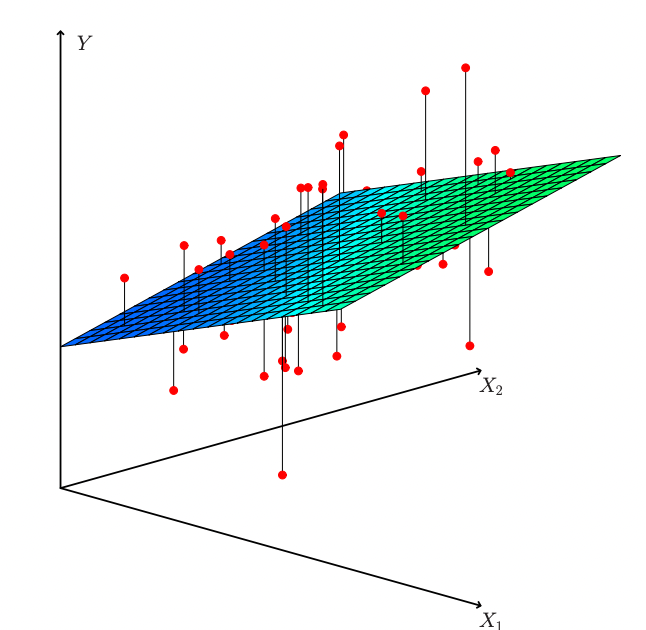

## Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

## Coleta e processamento dos dados

Lendo o dataframe do arquivo CSV

In [ ]:
df = pd.read_csv('df_olimpiadas_2004_2024.csv',sep = ';')

In [ ]:
df.head(2)

,slug_game,country_name,country_3_letter_code,game_year,Qtd_Medalhas_Pais,Qtd_Medalhas_Ouro,Qtd_Medalhas_Prata,Qtd_Medalhas_Bronze,Qtd_Esportes_Distintos,Qtd_Times,Health_Expenditure,Health_Media_Gpd,Culture_Expenditure,Culture_Media_Gpd,Education_Expenditure,Education_Media_Gpd
0,paris-2024,United States of America,USA,2024,126,40,44,42,44,264,6.622703e+08,10.24494,1.725794e+07,0.26697,3.618440e+08,5.59752
1,paris-2024,China,CHN,2024,91,40,27,24,42,232,1.173621e+08,2.89510,1.702467e+07,0.41997,1.465649e+08,3.61548


In [ ]:
print(len(df))

596


Iremos excluir as linhas com algum valor nulo

In [ ]:
df = df.dropna()
print(len(df))

267


In [ ]:
df[df.country_name == 'Brazil']

,slug_game,country_name,country_3_letter_code,game_year,Qtd_Medalhas_Pais,Qtd_Medalhas_Ouro,Qtd_Medalhas_Prata,Qtd_Medalhas_Bronze,Qtd_Esportes_Distintos,Qtd_Times,Health_Expenditure,Health_Media_Gpd,Culture_Expenditure,Culture_Media_Gpd,Education_Expenditure,Education_Media_Gpd
19,paris-2024,Brazil,BRA,2024,20,3,7,10,37,162,2.510185e+07,6.278540,808161.948,0.202140,1.975652e+07,4.941550
99,athens-2004,Brazil,BRA,2004,10,5,2,3,27,121,4.825355e+06,3.996087,196295.730,0.165483,5.354822e+06,4.425163
176,beijing-2008,Brazil,BRA,2008,17,3,4,10,31,145,1.314578e+07,4.426260,779198.622,0.257277,1.270975e+07,4.266890
264,london-2012,Brazil,BRA,2012,17,3,5,9,33,141,2.600006e+07,4.744557,1620510.125,0.292973,2.753457e+07,4.998727
348,rio-2016,Brazil,BRA,2016,19,7,6,6,40,249,2.754073e+07,4.778003,1773136.734,0.302037,2.933750e+07,5.085223
515,tokyo-2020,Brazil,BRA,2020,20,6,6,8,32,140,2.776475e+07,5.147007,1123854.244,0.208330,2.812546e+07,5.211600


Iremos retirar colunas que não utilizaremos no processo de treinamento

In [ ]:
df = df.drop(columns = ['slug_game','country_name','Qtd_Medalhas_Ouro','Qtd_Medalhas_Prata','Qtd_Medalhas_Bronze'])

## Visualização dos dados

Nessa etapa iremos visualizar os nossos dados através de boxplots, e também visualizar a relação entre as variáveis através do coeficiente de correlação de Pearson.

<Figure size 1500x1200 with 0 Axes>

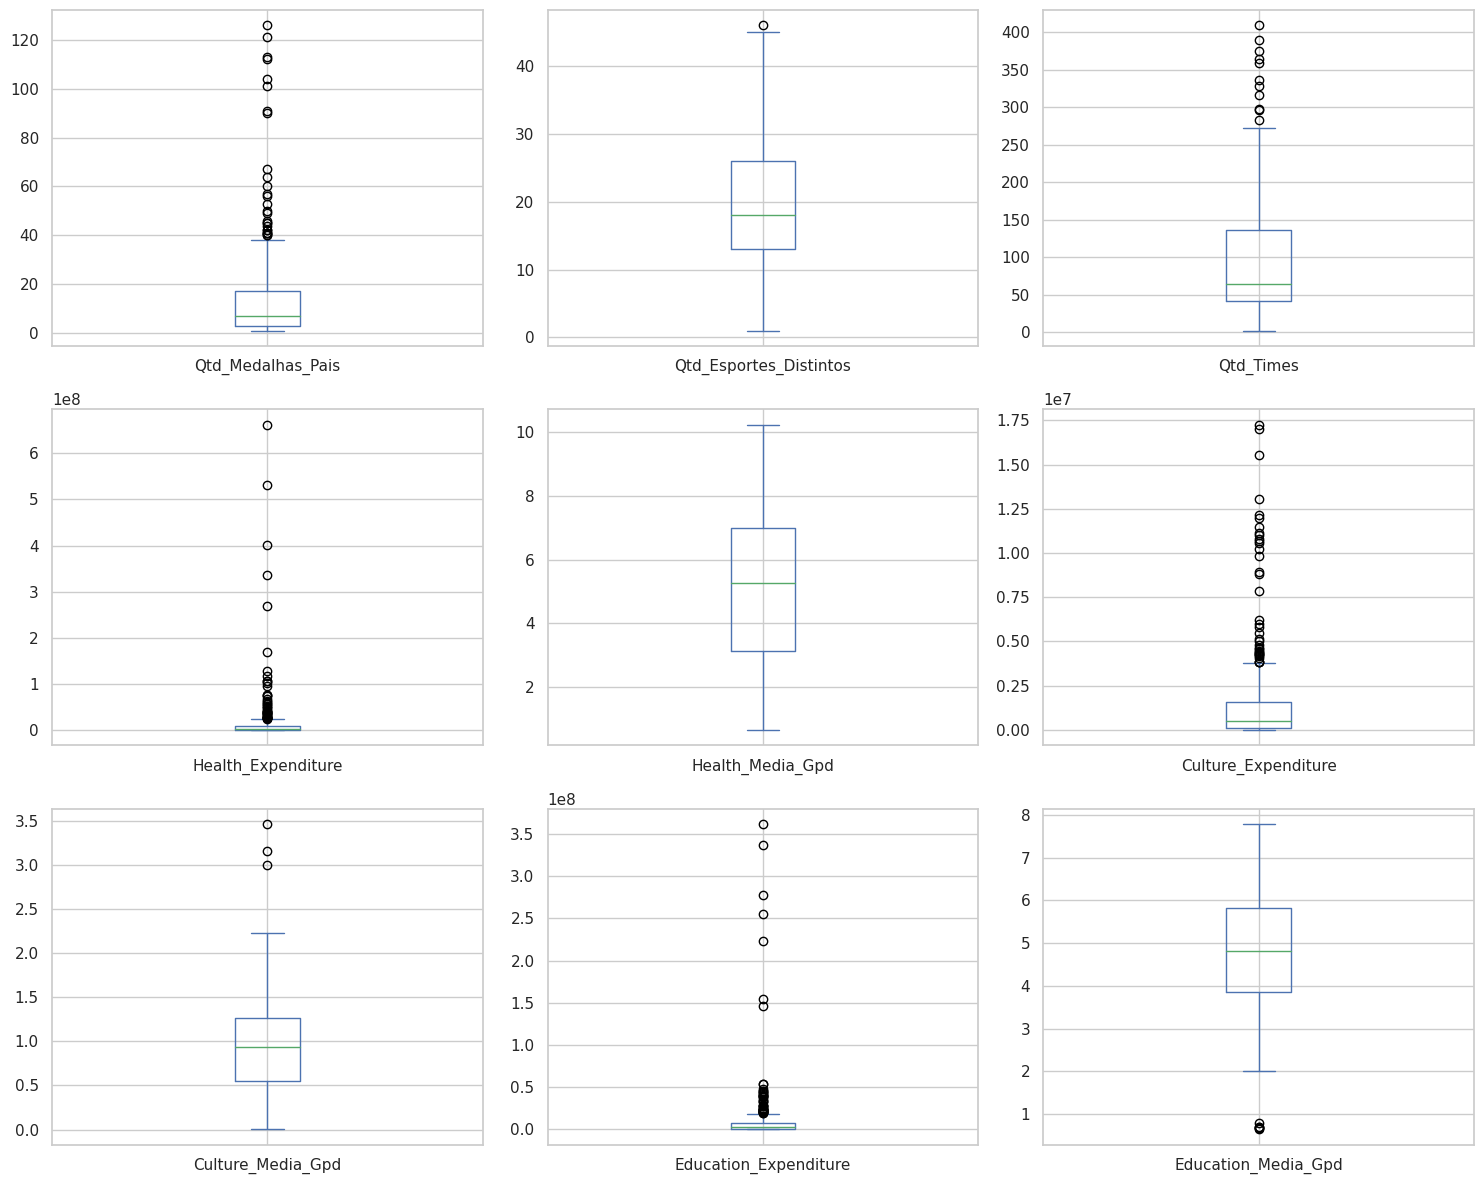

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")  # Define o estilo do grid branco para os gráficos

## Suponha que você tenha um DataFrame chamado df_treino com 9 colunas
plt.figure(figsize=(15, 12))

# Criar box plots para cada coluna do DataFrame
df.drop(columns = {'game_year','country_3_letter_code'}).plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(15, 12))

# Ajustar o layout para evitar sobreposição dos gráficos
plt.tight_layout()

# Exibir os gráficos
plt.show()



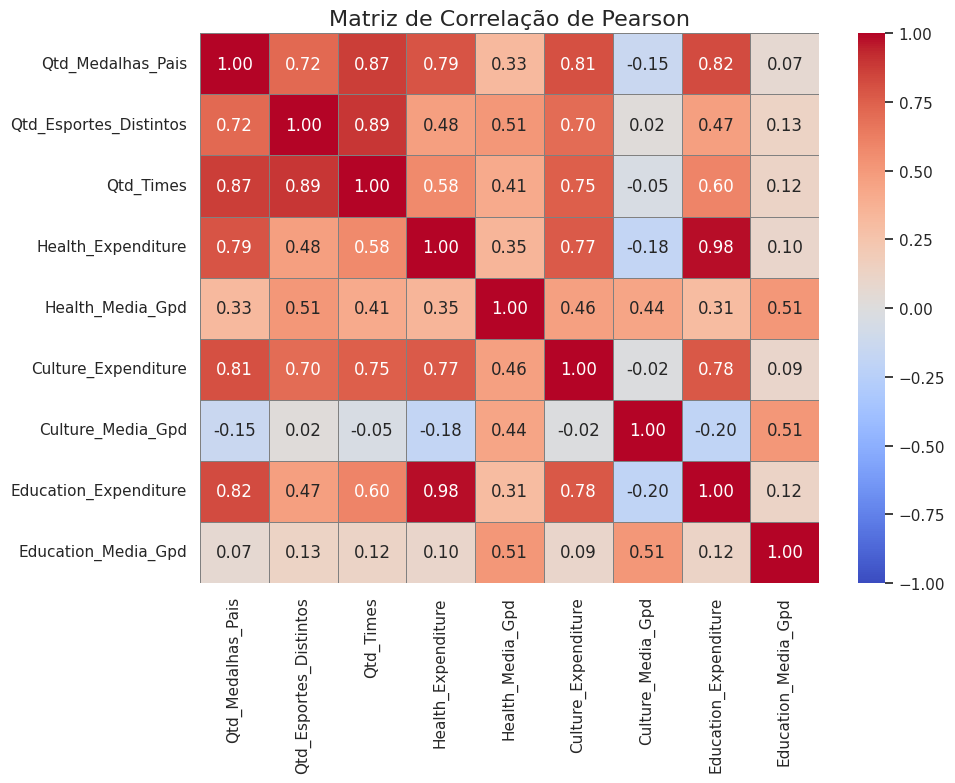

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculando a matriz de correlação de Pearson
correlation_matrix = df.drop(columns = {'game_year','country_3_letter_code'}).corr()

# Configurando o estilo do gráfico
sns.set(style='white')

# Criando o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    linecolor='gray',
    vmin=-1, vmax=1
)

# Adicionando título e ajustando o layout
plt.title('Matriz de Correlação de Pearson', size=16)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

## Feature Scaling

Como temos diferentes variáveis independentes numéricas, iremos realizar o feature scaling para que todas fiquem na mesma escala e não acabem tendo mais peso no modelo

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df_treino = df

In [ ]:
scaler = StandardScaler()
df_treino[['Qtd_Esportes_Distintos', 'Qtd_Times','Health_Expenditure','Health_Media_Gpd', 'Culture_Expenditure', 'Culture_Media_Gpd',
'Education_Expenditure', 'Education_Media_Gpd']] = scaler.fit_transform(df_treino[['Qtd_Esportes_Distintos', 'Qtd_Times'
,'Health_Expenditure','Health_Media_Gpd', 'Culture_Expenditure', 'Culture_Media_Gpd',
'Education_Expenditure', 'Education_Media_Gpd']])

In [ ]:
df_treino.head()

,country_3_letter_code,game_year,Qtd_Medalhas_Pais,Qtd_Esportes_Distintos,Qtd_Times,Health_Expenditure,Health_Media_Gpd,Culture_Expenditure,Culture_Media_Gpd,Education_Expenditure,Education_Media_Gpd
0,USA,2024,126,2.343340,1.944309,9.833482,2.178311,5.223524,-1.255958,8.228470,0.596533
1,CHN,2024,91,2.145998,1.570085,1.501421,-0.914411,5.145398,-0.972208,3.140594,-0.834263
2,JPN,2024,45,2.047327,1.113999,1.649507,1.787614,1.525873,-0.905554,0.806126,-0.914471
3,AUS,2024,53,2.145998,1.429751,0.308791,1.327444,0.922350,-0.040708,0.332118,0.737545
4,FRA,2024,64,2.442010,1.885836,0.857306,1.734140,3.294392,0.853328,0.687852,0.328015


In [ ]:
df_treino.isnull().sum()

,0
game_year,0
Qtd_Medalhas_Pais,0
Qtd_Esportes_Distintos,0
Qtd_Times,0
Health_Expenditure,0
Health_Media_Gpd,0
Culture_Expenditure,0
Culture_Media_Gpd,0
Education_Expenditure,0
Education_Media_Gpd,0


## Treino, validação e teste

Aqui iremos treinar e validar o nosso modelo com dados de 2004 a 2020, e em seguida testar a performance do modelo nos dados de 2024.

In [ ]:
X_test = df_treino[df_treino.game_year == 2024].drop(columns = ['Qtd_Medalhas_Pais', 'game_year','country_3_letter_code'])
y_test = df_treino[df_treino.game_year == 2024]['Qtd_Medalhas_Pais']

In [ ]:
X = df_treino[df_treino.game_year < 2024].drop(columns = ['Qtd_Medalhas_Pais', 'game_year','country_3_letter_code'])   # Variáveis independentes
y = df_treino[df_treino.game_year < 2024]['Qtd_Medalhas_Pais']  # Variável dependente

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Tamanho treino:", len(X_train))
print("Tamanho validação:", len(X_val))
print("Tamanho teste:", len(X_test))

Tamanho treino: 169
Tamanho validação: 43
Tamanho teste: 55


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
# Calculando o erro absoluto médio
mae = mean_absolute_error(y_val, y_pred)

# Calculando o erro quadrático médio
mse = mean_squared_error(y_val, y_pred)

# Calculando a raiz do erro quadrático médio
rmse = np.sqrt(mse)

# Calculando o R^2
r2 = r2_score(y_val, y_pred)

# Exibindo as métricas
print("Métricas no conjunto de validação:\n")
print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinação (R^2): {r2:.2f}")

Métricas no conjunto de validação:

Erro Absoluto Médio (MAE): 5.05
Erro Quadrático Médio (MSE): 44.85
Raiz do Erro Quadrático Médio (RMSE): 6.70
Coeficiente de Determinação (R^2): 0.93


### Teste

In [ ]:
y_pred_2024 = model.predict(X_test)

In [ ]:
# Calculando o erro absoluto médio
mae = mean_absolute_error(y_test, y_pred_2024)

# Calculando o erro quadrático médio
mse = mean_squared_error(y_test, y_pred_2024)

# Calculando a raiz do erro quadrático médio
rmse = np.sqrt(mse)

# Calculando o R^2
r2 = r2_score(y_test, y_pred_2024)

# Exibindo as métricas
print("Métricas no conjunto de teste:\n")
print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinação (R^2): {r2:.2f}")

Métricas no conjunto de teste:

Erro Absoluto Médio (MAE): 6.21
Erro Quadrático Médio (MSE): 103.22
Raiz do Erro Quadrático Médio (RMSE): 10.16
Coeficiente de Determinação (R^2): 0.80


## Treino final

Nessa etapa iremos fazer o treinamento final do modelo e realizar a predição para as olimpíadas de 2024.

### Treino

In [ ]:
X = df_treino[df_treino.game_year < 2024].drop(columns = ['Qtd_Medalhas_Pais', 'game_year','country_3_letter_code'])   # Variáveis independentes
y = df_treino[df_treino.game_year < 2024]['Qtd_Medalhas_Pais']  # Variável dependente

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

### Predição para 2024 por país

In [ ]:
X_2024 = df_treino[df_treino.game_year == 2024].drop(columns = ['Qtd_Medalhas_Pais', 'game_year','country_3_letter_code'])   # Variáveis independentes

In [ ]:
y_pred_2024 = model.predict(X_2024)

In [ ]:
df_pred_2024 = df_pred_2024.dropna()

In [ ]:
VARS_2024 = df_treino[df_treino.game_year == 2024]
game_years = VARS_2024 ['game_year']
country_codes = VARS_2024 ['country_3_letter_code']

# Criar um DataFrame com as predições e adicionar 'game_year' e 'country_3_letter_code'
df_pred_2024 = pd.DataFrame({
    'game_year': game_years,
    'country_3_letter_code': country_codes,
    'Qtd_Medalhas_Pred': y_pred_2024
})

In [ ]:
df_pred_2024.head()

,game_year,country_3_letter_code,Qtd_Medalhas_Pred
0,2024,USA,88.446965
1,2024,CHN,54.942983
2,2024,JPN,23.631911
3,2024,AUS,27.619778
4,2024,FRA,34.042238


## Dataframe final com predição

Aqui iremos juntar a predição dos valores de 2024 com o nosso dataframe que possui as outras informações dos países, gerando um arquivo csv que irá alimentar o nosso sistema de perguntas e respostas sobre dados SQL

In [ ]:
!pip install pandasql -q U
import pandasql as psql

  Preparing metadata (setup.py) ... done


In [ ]:
df_2004_2024 = pd.read_csv('df_olimpiadas_2004_2024.csv',sep = ';')

In [ ]:
df_2004_2024.head()

,slug_game,country_name,country_3_letter_code,game_year,Qtd_Medalhas_Pais,Qtd_Medalhas_Ouro,Qtd_Medalhas_Prata,Qtd_Medalhas_Bronze,Qtd_Esportes_Distintos,Qtd_Times,Health_Expenditure,Health_Media_Gpd,Culture_Expenditure,Culture_Media_Gpd,Education_Expenditure,Education_Media_Gpd
0,paris-2024,United States of America,USA,2024,126,40,44,42,44,264,6.622703e+08,10.24494,1.725794e+07,0.26697,3.618440e+08,5.59752
1,paris-2024,China,CHN,2024,91,40,27,24,42,232,1.173621e+08,2.89510,1.702467e+07,0.41997,1.465649e+08,3.61548
2,paris-2024,Japan,JPN,2024,45,20,12,13,41,193,1.270468e+08,9.31645,6.217111e+06,0.45591,4.778849e+07,3.50437
3,paris-2024,Australia,AUS,2024,53,18,19,16,42,220,3.936536e+07,8.22286,4.415049e+06,0.92224,2.773219e+07,5.79286
4,paris-2024,France,FRA,2024,64,16,26,22,45,259,7.523770e+07,9.18937,1.149774e+07,1.40431,4.278405e+07,5.22555


In [ ]:
query = """

select
   a.*
  ,cast(b.Qtd_Medalhas_Pred as int) as Predicao_Qtd_Medalhas_Pais
from df_2004_2024 as a
left join df_pred_2024 as b on a.country_3_letter_code = b.country_3_letter_code and a.game_year = b.game_year
"""

In [ ]:
df_final = psql.sqldf(query, locals())

In [ ]:
df_final.head()

,slug_game,country_name,country_3_letter_code,game_year,Qtd_Medalhas_Pais,Qtd_Medalhas_Ouro,Qtd_Medalhas_Prata,Qtd_Medalhas_Bronze,Qtd_Esportes_Distintos,Qtd_Times,Health_Expenditure,Health_Media_Gpd,Culture_Expenditure,Culture_Media_Gpd,Education_Expenditure,Education_Media_Gpd,Predicao_Qtd_Medalhas_Pais
0,paris-2024,United States of America,USA,2024,126,40,44,42,44,264,6.622703e+08,10.24494,1.725794e+07,0.26697,3.618440e+08,5.59752,88.0
1,paris-2024,China,CHN,2024,91,40,27,24,42,232,1.173621e+08,2.89510,1.702467e+07,0.41997,1.465649e+08,3.61548,54.0
2,paris-2024,Japan,JPN,2024,45,20,12,13,41,193,1.270468e+08,9.31645,6.217111e+06,0.45591,4.778849e+07,3.50437,23.0
3,paris-2024,Australia,AUS,2024,53,18,19,16,42,220,3.936536e+07,8.22286,4.415049e+06,0.92224,2.773219e+07,5.79286,27.0
4,paris-2024,France,FRA,2024,64,16,26,22,45,259,7.523770e+07,9.18937,1.149774e+07,1.40431,4.278405e+07,5.22555,34.0


In [ ]:
df_final.to_csv('df_olimpiadas_2004_2024_final.csv',sep = ';')